In [25]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
cars = pd.read_csv("cars.csv")

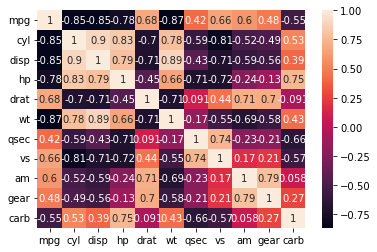

In [10]:
corrMatrix = cars.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

For the above correlation matrix, we can see positive correlations above .85 to be: cyl&disp, disp&wt
For correlations above -.85: cyl&mpg, disp&mgp, wt&mpg
I believe this is enough information to work with. 

<AxesSubplot:xlabel='hp', ylabel='mpg'>

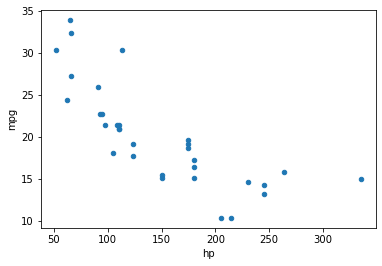

In [13]:
 cars.plot.scatter(x = 'hp', y = 'mpg')

mpg & hp do seem to be negativly correlated. According to our correlation matrix, the correlation is ~-0.75

In [17]:
X = np.array(cars['hp']).reshape(-1, 1)
Y = np.array(cars['mpg']).reshape(-1, 1)

In [20]:
X

array([[110],
       [110],
       [ 93],
       [110],
       [175],
       [105],
       [245],
       [ 62],
       [ 95],
       [123],
       [123],
       [180],
       [180],
       [180],
       [205],
       [215],
       [230],
       [ 66],
       [ 52],
       [ 65],
       [ 97],
       [150],
       [150],
       [245],
       [175],
       [ 66],
       [ 91],
       [113],
       [264],
       [175],
       [335],
       [109]], dtype=int64)

In [24]:
Y

array([[21. ],
       [21. ],
       [22.8],
       [21.4],
       [18.7],
       [18.1],
       [14.3],
       [24.4],
       [22.8],
       [19.2],
       [17.8],
       [16.4],
       [17.3],
       [15.2],
       [10.4],
       [10.4],
       [14.7],
       [32.4],
       [30.4],
       [33.9],
       [21.5],
       [15.5],
       [15.2],
       [13.3],
       [19.2],
       [27.3],
       [26. ],
       [30.4],
       [15.8],
       [19.7],
       [15. ],
       [21.4]])

In [26]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [32]:
regr.coef_

array([[-0.06822828]])

In [31]:
regr.intercept_

array([30.09886054])

Y = B0 + B1

Y = 30.09886054 + -0.06822828 X1 + e

In [35]:
regr.score(X, Y)

0.602437341423934

In [40]:
regr.predict([[100]])

array([[23.27603273]])

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, regr.predict(X))

2.907452474234763

A mean absolute error of 2.907452474234763 means that in average, our model makes an error of +/- 2.907452474234763 when predicting the mpg given its hp.

Y = B0 + B1

Y = 30.09886054 + -0.06822828 X1 +/- 2.907452474234763